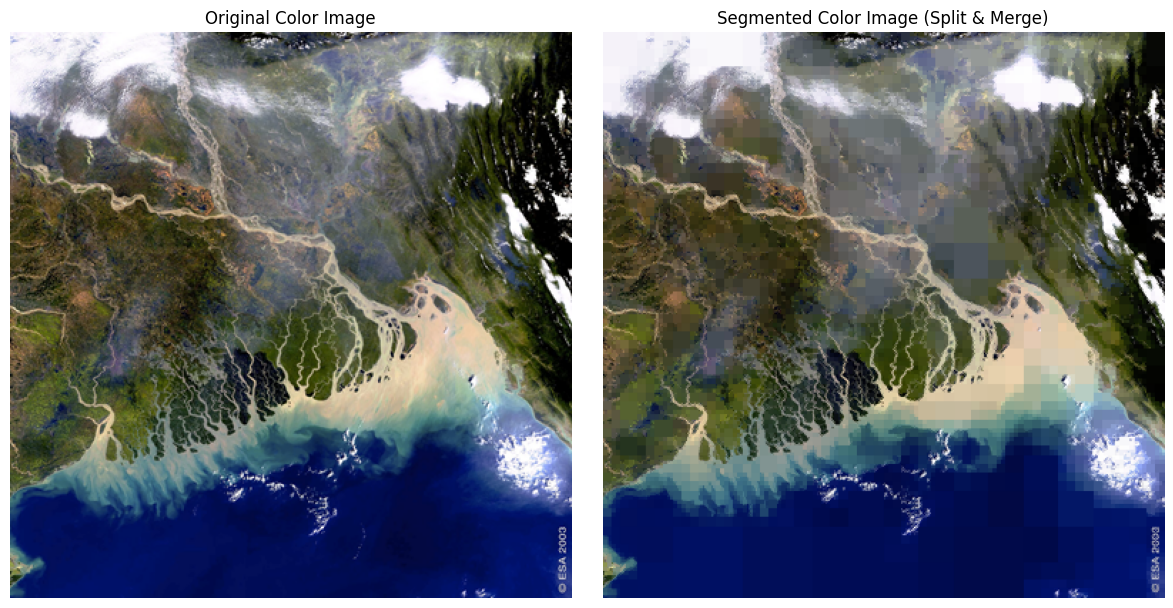

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to check homogeneity using standard deviation
def is_homogeneous(region, threshold):
    return np.std(region) < threshold

# Recursive splitting function
def split(image, x, y, width, height, threshold):
    region = image[y:y+height, x:x+width]
    if width <= 1 or height <= 1 or is_homogeneous(region, threshold):
        return [(x, y, width, height)]
    
    half_w, half_h = width // 2, height // 2
    segments = []
    segments += split(image, x, y, half_w, half_h, threshold)
    segments += split(image, x + half_w, y, width - half_w, half_h, threshold)
    segments += split(image, x, y + half_h, half_w, height - half_h, threshold)
    segments += split(image, x + half_w, y + half_h, width - half_w, height - half_h, threshold)
    return segments

# Merging function for color image
def merge_color(image, segments):
    result = np.zeros_like(image, dtype=np.uint8)
    
    for (x, y, w, h) in segments:
        region = image[y:y+h, x:x+w]
        mean_color = np.mean(region.reshape(-1, 3), axis=0).astype(np.uint8)
        result[y:y+h, x:x+w] = mean_color
    return result

# Load the color image
image = cv2.imread("C:\\Users\\Admin\\Pictures\\presentation CV\\rising-water-and-sinking-land-the-ganges-delta.png")
if image is None:
    raise FileNotFoundError("Image not found. Check the file path!")

# Convert from BGR (OpenCV) to RGB (matplotlib)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Use grayscale just for homogeneity check
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Set homogeneity threshold
threshold = 10

# Region splitting using grayscale for logic
segments = split(gray, 0, 0, gray.shape[1], gray.shape[0], threshold)

# Merge using original color image
color_segmented = merge_color(image_rgb, segments)

# Show results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Color Image")
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Segmented Color Image (Split & Merge)")
plt.imshow(color_segmented)
plt.axis('off')

plt.tight_layout()
plt.show()